## GRUPO 2

In [1]:
#PCA
from sklearn.decomposition import PCA
# Tensorflow
import tensorflow as tf
from tensorflow import keras

#Genericas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import standardize
import math
import cv2

## Limpieza del dataset

Carga de dataset de imagenes y dataset de nombres

In [2]:
X = np.load('AUSTRAL_MCD_FACE_v2.npy')
y = np.load('AUSTRAL_MCD_FACE_TARGET_v2.npy')
print(X.shape)
print(y.shape)

(341, 150, 150)
(341,)


In [3]:
def data_augmentation(X, y):
    X_aug = []
    y_aug = []
    for i in range(len(X)):
        X_aug.append(X[i])
        X_aug.append(cv2.flip(X[i], 1))
        X_aug.append(cv2.flip(X[i], 0))
        X_aug.append(cv2.flip(X[i], -1))
        X_aug.append(cv2.rotate(X[i], cv2.ROTATE_90_CLOCKWISE))
        X_aug.append(cv2.rotate(X[i], cv2.ROTATE_90_COUNTERCLOCKWISE))
        X_aug.append(cv2.rotate(X[i], cv2.ROTATE_180))
        for j in range(7):
            y_aug.append(y[i])
    return np.array(X_aug), np.array(y_aug) 

X,y=data_augmentation(X, y)
print(X.shape)
print(y.shape)

(2387, 150, 150)
(2387,)


Persona|Aparece|Observaciones
--- | ---|---
Andres | 22 |---
Carla | 21 |Borrar
Claudia | 12 |---
Edu | 27 |---
Elemir | 12 |---
Fernanda | 20 |---
Geronimo | 11 |---
Hernan | 18 |---
Jiang | 19 |---
Joaquin | 10 |---
Josefina | 12 |---
Julieta | 12 |---
Lujan | 10 |---
Mai | 15 |---
Marcelo G | 10 |---
Marcelo T | 16 |---
Maribel | 10 |---
Marisa | 10 |---
Nestor | 10 |---
Oscar | 10 |---
Ramon | 10 |---
Rodrigo E | 9 |---
Rodrigo E.jpg | 1 |Borrar
Rodrigo G | 11 |Borrar
Sebastian | 14 |---
Silvia | 9 |La que menos aparece

Se eliminan alumnos que ya no cursan la maestria

In [4]:
X = np.delete(X, np.where(y == 'Rodrigo E.jpg'), 0)
y = np.delete(y, np.where(y == 'Rodrigo E.jpg'), 0)

X = np.delete(X, np.where(y == 'Rodrigo G'), 0)
y = np.delete(y, np.where(y == 'Rodrigo G'), 0)

X = np.delete(X, np.where(y == 'Carla'), 0)
y = np.delete(y, np.where(y == 'Carla'), 0)

nombres_y=y
nombres_y

array(['Marcelo T', 'Marcelo T', 'Marcelo T', ..., 'Marcelo T',
       'Marcelo T', 'Marcelo T'], dtype='<U13')

Obtener los nombres únicos en el arreglo y número de registros a recopilar por cada nombre


In [5]:
nombres_unicos = np.unique(y)  

registros_por_nombre = 100

resultados = []
resultados2 = []

for nombre in nombres_unicos:
    indices = np.where(y == nombre)[0][:registros_por_nombre]
    registros = y[indices]
    registros2 = X[indices]
    resultados.extend(registros)
    resultados2.extend(registros2)

resultados = np.array(resultados)
y = resultados
X = np.array(resultados2)

In [318]:
print(y.shape)
print(X.shape)

(1897,)
(1897, 150, 150)


In [6]:
# Lista de nombres
nombres = np.unique(y)

# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}

# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])

y = np.searchsorted(nombres, y)

In [7]:
# Lista de nombres
nombres = np.unique(y)
nombres

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [8]:
# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}
mapeo_nombres

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22}

In [9]:
# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])
nombres_codificados

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [10]:
y = np.searchsorted(nombres, y)
y

array([ 0,  0,  0, ..., 22, 22, 22], dtype=int64)

Armamos set de entrenamiento y test

In [11]:
percentage = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=42)
targets = y.reshape(-1, 1)

In [12]:
X_train.shape, Y_train.shape

((1327, 150, 150), (1327,))

In [13]:
X_test.shape, Y_test.shape

((570, 150, 150), (570,))

Imprime los valores únicos y las cantidades de repeticiones del set de entrenamiento

In [14]:
unique, counts = np.unique(Y_train, return_counts=True)
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|
--- | ---|---
0 | 70 |---
1 | 59 |---
2 | 70 |---
3 | 59 |---
4 | 70 |---
5 | 54 |---
6 | 70 |---
7 | 70 |---
8 | 49 |---
9 | 59 |---
10 | 58 |---
11 | 49 |---
12 | 70 |---
13 | 49 |---
14 | 70 |---
15 | 49 |---
16 | 49 |---
17 | 49 |---
18 | 49 |---
19 | 49 |---
20 | 44 |---
21 | 68 |---
22 | 44 |---


Imprime los valores únicos y las cantidades de repeticiones del set de test

In [15]:
unique, counts = np.unique(Y_test, return_counts=True)
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|
--- | ---|---
0 | 30 |---
1 | 25 |---
2 | 30 |---
3 | 25 |---
4 | 30 |---
5 | 23 |---
6 | 30 |---
7 | 30 |---
8 | 21 |---
9 | 25 |---
10 | 26 |---
11 | 21 |---
12 | 30 |---
13 | 21 |---
14 | 30 |---
15 | 21 |---
16 | 21 |---
17 | 21 |---
18 | 21 |---
19 | 21 |---
20 | 19 |---
21 | 30 |---
22 | 19 |---


# 1.PCA

Vemos las componentes del conjunto en test y train.

In [16]:
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("Numero de target", len(np.unique(y)))

print("\nEtiquetas distintas en cada target")
print("Y_train shape", len(np.unique(Y_train)))
print("Y_test shape", len(np.unique(Y_test)))


X_train shape (1327, 150, 150)
Y_train shape (1327,)
X_test shape (570, 150, 150)
Y_test shape (570,)
Numero de target 23

Etiquetas distintas en cada target
Y_train shape 23
Y_test shape 23


Graficamos algunos ejemplos del conjunto dado del set de entrenamiento

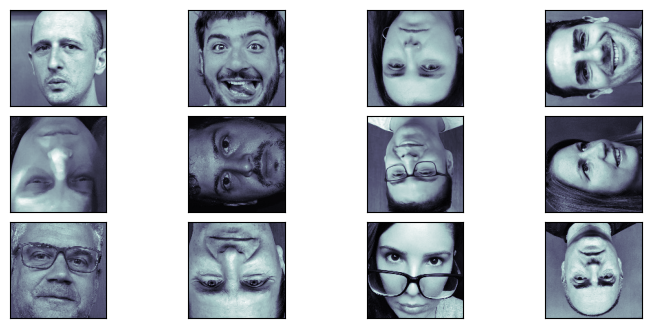

In [17]:
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='bone')

Hago un reshaping para poder hacer el PCA

In [18]:
# Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0], 22500) 
X_test = X_test.reshape(X_test.shape[0], 22500)  

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (1327, 22500)
Testing matrix shape (570, 22500)


Estandarizamos para aplicar escala de grises

In [19]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 255.0
0.0 255.0
0.0 1.0
0.0 1.0


Aplicamos PCA para 90% de la variabilidad de los datos

In [20]:
pca = PCA(n_components=.90, svd_solver = 'full')
pca.fit(X_train)

PCA(n_components=0.9, svd_solver='full')

Cantidad de componentes principales que explican una variabilidad del 90 %

In [21]:
pca.n_components_

183

In [22]:
# Calcula la variancia acumulada
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>90)
print("Componentes variancia 90%: "+ str(k+1))

Componentes variancia 90%: 183


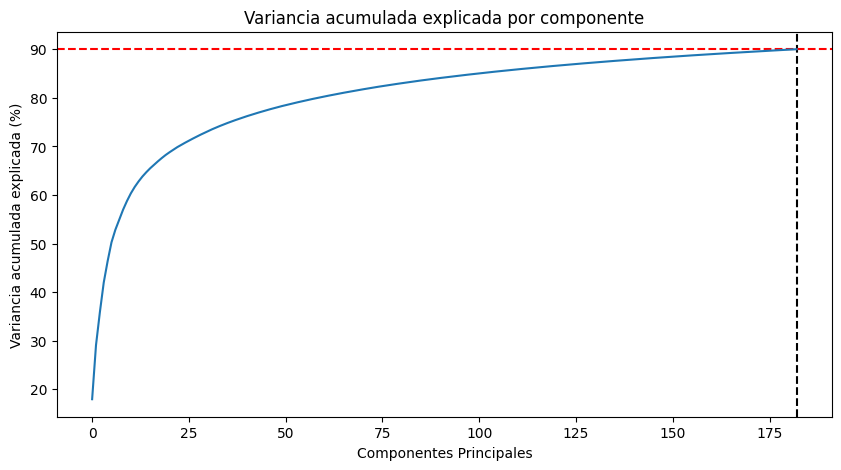

In [23]:
# Grafica Variancia Acumulada
plt.figure(figsize=[10,5])
plt.title('Variancia acumulada explicada por componente')
plt.ylabel('Variancia acumulada explicada (%)')
plt.xlabel('Componentes Principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Aplicamos PCA para ambos sets (entrenamiento y test)

In [24]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
print(f'test_img shape : {test_img.shape}')

train_img shape : (1327, 183)
test_img shape : (570, 183)


Las etiquetas de `Y_train` y `Y_test` son números entre 0 y 24.

Convertimos las etiquetas de clase a la codificación 1-de-K. Para ello utilizamos la función `keras.utils.to_categorical` (similar al  `OneHotEncoder` de `sklearn`).


In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
Y_train_ohe = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_ohe = encoder.fit_transform(Y_test.reshape(-1, 1)).toarray()

print(Y_train_ohe[:3], Y_train[:3])
print(Y_test_ohe[:3], Y_test[:3])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [5 8 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [7 7 0]


# 2.Creación de la red neuronal 

In [26]:
def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)

In [27]:
# Seteo el set de entrenamiento
X = train_img
Y = Y_train_ohe

Utilizamos 60 neuronas

In [28]:
#Parametros
filas_qty = len(X)
input_size = X.shape[1]   # 2 entradas
hidden_size = 60  # neuronas capa oculta
output_size = Y.shape[1]  # 1 neurona

Definimos las funciones de activacion logística para la capa oculta y la capa de salida

In [29]:
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'logsig'  # uso la logistica

Incializamos las matrices de pesos azarosamente. W1 son los pesos que van del input a la capa oculta y W2 son los pesos que van de la capa oculta a la capa de salida

In [30]:
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedi general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )

In [31]:
# Inicializo
epoch_limit = 2000    
Error_umbral = 1.0e-06
learning_rate = 0.20
Error_last = 10   
epoch = 0

In [32]:
while (math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )

## Evaluar el modelo

In [33]:
# Seteamos el dataset de prueba
X = test_img
Y = Y_test_ohe

In [34]:
# Recalculamos las filas de dataset de test
filas_qty = len(X)
resultados = []

# Recorremos todas las fotos del set de testing
cantidad_aciertos=0

for fila in range(filas_qty): #para cada input x_sub_fila del vector X
    # propagar el x hacia adelante
    hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo los errores en la capa hidden y la capa output
    ErrorSalida = Y[fila:fila+1,:].T - output_salidas
   
    # Verificar si la predicción es correcta
    prediccion_correcta = nombres_unicos[np.argmax(Y[fila:fila+1,:].T)] == nombres_unicos[np.argmax(output_salidas)]
    
    # Agregar el resultado a la lista
    resultados.append({'Foto': fila+1,
                       'Clase Real': nombres_unicos[np.argmax(Y[fila:fila+1,:].T)],
                       'Clase Predicha': nombres_unicos[np.argmax(output_salidas)],
                       'Predicción Correcta': prediccion_correcta})
    
    if (np.argmax(Y[fila:fila+1,:].T)==np.argmax(output_salidas)):
        cantidad_aciertos += 1
        
       
# Crear la tabla con los resultados
tabla_resultados = pd.DataFrame(resultados)
pd.set_option('display.max_rows', None)
              
# Mostrar la tabla
print(tabla_resultados)

print("Cantidad de aciertos: ", cantidad_aciertos, "sobre un total de ",filas_qty, "fotos")
print("Accuracy: ", (cantidad_aciertos/filas_qty)*100)

     Foto Clase Real Clase Predicha  Predicción Correcta
0       1      Jiang        Joaquin                False
1       2      Jiang          Jiang                 True
2       3     Andres         Andres                 True
3       4   Geronimo         Nestor                False
4       5  Sebastian      Sebastian                 True
5       6      Jiang       Josefina                False
6       7   Josefina       Josefina                 True
7       8      Jiang          Jiang                 True
8       9      Lujan          Lujan                 True
9      10  Sebastian      Sebastian                 True
10     11  Sebastian      Sebastian                 True
11     12     Silvia         Silvia                 True
12     13     Elemir        Maribel                False
13     14     Nestor          Lujan                False
14     15    Joaquin        Joaquin                 True
15     16   Fernanda        Claudia                False
16     17        Mai        Cla

# Backpropagation 2 capas

In [35]:
# Seteo el set de entrenamiento
X = train_img
Y = Y_train_ohe

In [36]:
#Parametros
filas_qty = len(X)
input_size = X.shape[1]   # 2 entradas
hidden_size1 = 35  # neuronas en la primera capa oculta
hidden_size2 = 35  # neuronas en la segunda capa oculta
output_size = Y.shape[1]  # 1 neurona

In [37]:
hidden_FUNC1 = 'logsig'  # usamos la logistica
hidden_FUNC2 = 'logsig'  # usamos la logistica
output_FUNC = 'logsig'  # uso la logistica

In [38]:
np.random.seed(1021) #mi querida random seed para que las corridas sean reproducibles
W1 = np.random.uniform(-0.5, 0.5, [hidden_size1, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size1, 1])
W2 = np.random.uniform(-0.5, 0.5, [hidden_size2, hidden_size1])
X02 = np.random.uniform(-0.5, 0.5, [hidden_size2, 1])
W3 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size2])
X03 = np.random.uniform(-0.5, 0.5, [output_size, 1])

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos1 = W1 @ X.T + X01
hidden_salidas1 = func_eval_vec(hidden_FUNC1, hidden_estimulos1)
hidden_estimulos2 = W2 @ hidden_salidas1 + X02
hidden_salidas2 = func_eval_vec(hidden_FUNC2, hidden_estimulos2)
output_estimulos = W3 @ hidden_salidas2 + X03
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedi general de TODOS los X
Error = np.mean((Y.T - output_salidas) ** 2)
print(f"Initial error: {Error}")

Initial error: 0.3007352647488774


In [39]:
# Inicializo
epoch_limit = 2000    
Error_umbral = 1.0e-06
learning_rate = 0.20
Error_last = 10   
epoch = 0

In [40]:
while (math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos1 = W1 @ X[fila : fila + 1, :].T + X01
        hidden_salidas1 = func_eval_vec(hidden_FUNC1, hidden_estimulos1)
        hidden_estimulos2 = W2 @ hidden_salidas1 + X02
        hidden_salidas2 = func_eval_vec(hidden_FUNC2, hidden_estimulos2)
        output_estimulos = W3 @ hidden_salidas2 + X03
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila : fila + 1, :].T - output_salidas
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        hidden_delta2 = deriv_eval_vec(hidden_FUNC2, hidden_salidas2) * (W3.T @ output_delta)
        hidden_delta1 = deriv_eval_vec(hidden_FUNC1, hidden_salidas1) * (W2.T @ hidden_delta2)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta1 @ X[fila : fila + 1, :])
        X01 = X01 + learning_rate * hidden_delta1
        W2 = W2 + learning_rate * (hidden_delta2 @ hidden_salidas1.T)
        X02 = X02 + learning_rate * hidden_delta2
        W3 = W3 + learning_rate * (output_delta @ hidden_salidas2.T)
        X03 = X03 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos1 = W1 @ X.T + X01
    hidden_salidas1 = func_eval_vec(hidden_FUNC1, hidden_estimulos1)
    hidden_estimulos2 = W2 @ hidden_salidas1 + X02
    hidden_salidas2 = func_eval_vec(hidden_FUNC2, hidden_estimulos2)
    output_estimulos = W3 @ hidden_salidas2 + X03
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )
    print("Error:", Error)

Error: 0.04128709928320434
Error: 0.040596246197393146
Error: 0.03975052358045566
Error: 0.03876498159804217
Error: 0.037661990236918824
Error: 0.03648473431614413
Error: 0.03541701082779289
Error: 0.03424597902728058
Error: 0.03297844503475624
Error: 0.03171343281209823
Error: 0.029711370593847482
Error: 0.027771660013301714
Error: 0.02600633879808946
Error: 0.024295640625812936
Error: 0.022389123711159968
Error: 0.0207601366969392
Error: 0.01942367042894589
Error: 0.018677334035027936
Error: 0.017421876320971027
Error: 0.016648191917782426
Error: 0.015624426671444942
Error: 0.013796998850990349
Error: 0.012872140783695701
Error: 0.012284542568046118
Error: 0.01212671656400762
Error: 0.011350176177817388
Error: 0.010866866158050752
Error: 0.0104074627045162
Error: 0.009077740912657051
Error: 0.009059574484095468
Error: 0.008304117586918902
Error: 0.008325294175512608
Error: 0.008302019578384931
Error: 0.007936399033898691
Error: 0.007660651971488675
Error: 0.007079816467145766
Error: 

# Evaluar el Modelo

In [41]:
# Seteamos el dataset de prueba
X = test_img
Y = Y_test_ohe

In [42]:
# Recalculamos las filas de dataset de test
filas_qty = len(X)
resultados = []

# Recorremos todas las fotos del set de testing
cantidad_aciertos=0

for fila in range(filas_qty): #para cada input x_sub_fila del vector X
    # propagar el x hacia adelante
    hidden_estimulos1_predict = W1 @ X[fila : fila + 1, :].T + X01
    hidden_salidas1_predict = func_eval_vec(hidden_FUNC1, hidden_estimulos1_predict)
    hidden_estimulos2_predict = W2 @ hidden_salidas1_predict + X02
    hidden_salidas2_predict = func_eval_vec(hidden_FUNC2, hidden_estimulos2_predict)
    output_estimulos_predict = W3 @ hidden_salidas2_predict + X03
    output_salidas = func_eval_vec(output_FUNC, output_estimulos_predict)
    
    # calculo los errores en la capa hidden y la capa output
    ErrorSalida = Y[fila : fila + 1, :].T - output_salidas
   
    # Verificar si la predicción es correcta
    prediccion_correcta = nombres_unicos[np.argmax(Y[fila:fila+1,:].T)] == nombres_unicos[np.argmax(output_salidas)]
    
    # Agregar el resultado a la lista
    resultados.append({'Foto': fila+1,
                       'Clase Real': nombres_unicos[np.argmax(Y[fila:fila+1,:].T)],
                       'Clase Predicha': nombres_unicos[np.argmax(output_salidas)],
                       'Predicción Correcta': prediccion_correcta})
    
    if (np.argmax(Y[fila:fila+1,:].T)==np.argmax(output_salidas)):
        cantidad_aciertos += 1
 
# Crear la tabla con los resultados
tabla_resultados = pd.DataFrame(resultados)
pd.set_option('display.max_rows', None)
              
# Mostrar la tabla
print(tabla_resultados)

print("Cantidad de aciertos: ", cantidad_aciertos, "sobre un total de ",filas_qty, "fotos")
print("Accuracy: ", (cantidad_aciertos/filas_qty)*100)

     Foto Clase Real Clase Predicha  Predicción Correcta
0       1      Jiang        Julieta                False
1       2      Jiang          Jiang                 True
2       3     Andres          Jiang                False
3       4   Geronimo      Marcelo G                False
4       5  Sebastian      Sebastian                 True
5       6      Jiang          Jiang                 True
6       7   Josefina            Mai                False
7       8      Jiang          Jiang                 True
8       9      Lujan          Lujan                 True
9      10  Sebastian      Sebastian                 True
10     11  Sebastian      Sebastian                 True
11     12     Silvia         Silvia                 True
12     13     Elemir         Elemir                 True
13     14     Nestor         Nestor                 True
14     15    Joaquin        Maribel                False
15     16   Fernanda            Edu                False
16     17        Mai         Ne